### Catálogo para diseño de gráficos

### 1. Librerías

In [1]:
# Librerías para tratamiento de datos
import pandas as pd
import numpy as np

# Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones prescindibles pero son utilizadas por comodidad
#sns.set_palette('Dark2') # Mapa de colores para Seaborn
plt.rcParams['savefig.bbox'] = 'tight' # Remover el espacio en blanco excesivo alrededor de un gráfico cuando este sea exportado
#sns.set_style('darkgrid') # Estilo de gráficos en seaborn para un solo snipped
#sns.set_themw('darkgrid') # Estilo de gráficos en seaborn para toda una sesión

### 2. Carga de datos 

In [2]:
import base64
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

In [3]:

onedrive_link = 'https://1drv.ms/u/s!AneKqxx3Qjofh8BiSfgf2uidxQO3nw?e=BYaPAb'
onedrive_direct_link = create_onedrive_directdownload(onedrive_link)
df_titanic = pd.read_csv(filepath_or_buffer = onedrive_direct_link)
#print(onedrive_link)
#print(onedrive_direct_link)
#df.head()

### 3. Matplot

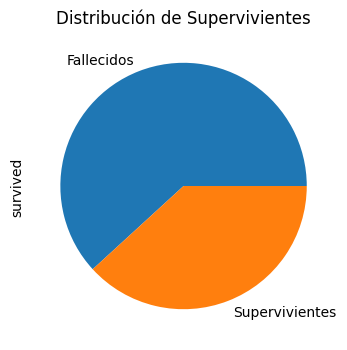

In [4]:
# Diagrama de sectores de fallecidos y de supervivientes Creando una figura con sus ejes
fig, ax = plt.subplots(figsize = (5,4))
(df_titanic['survived']
 .value_counts()
 .plot(kind = "pie", labels = ["Fallecidos","Supervivientes"],
       title = "Distribución de Supervivientes"))
plt.show()

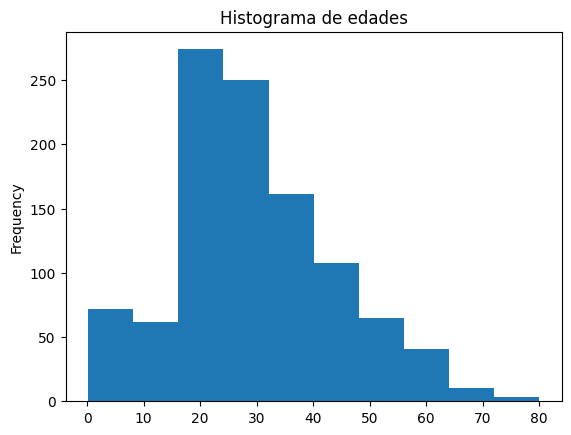

In [5]:
# Histograma de edades
df_titanic.age.plot(kind = "hist", title = "Histograma de edades")
plt.show()

In [6]:
# Construir un diagrama de barras con respecto al número de personas de cada clase 
(df_titanic.pclass
 .value_counts()
 .plot(kind = "bar", title = "Núero de personas por clase")
plt.show()

SyntaxError: invalid syntax (1906903401.py, line 5)

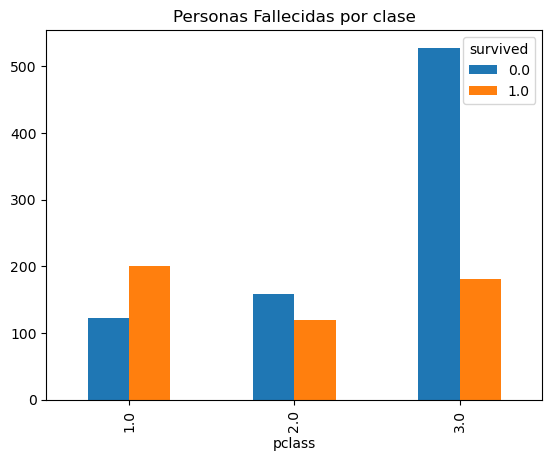

In [ ]:
# Diagrama de barras que muetsre el número de personas fallecidas y supervivientes por clase
(df_titanic.groupby(["pclass","survived"])
 .size().unstack()
 .plot(kind = "bar",
       title = "Personas Fallecidas por clase"))
plt.show()

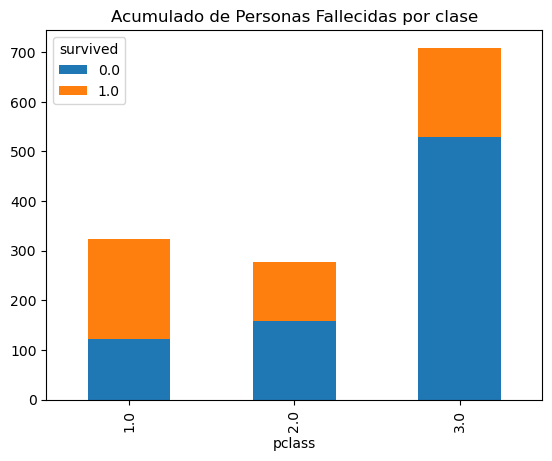

In [ ]:
# El mismo gráfico peero con obs acumuladas
(df_titanic.groupby(["pclass","survived"])
 .size().unstack()
 .plot(kind = "bar", stacked = True, title = "Acumulado de Personas Fallecidas por clase"))
plt.show()

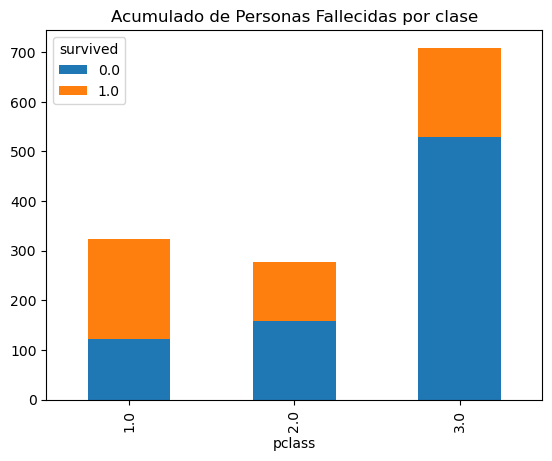

In [ ]:
(df_titanic.groupby(["pclass","survived"])
 .size().unstack(level = 1)
 .plot(kind = "bar", stacked = True,
       title = "Acumulado de Personas Fallecidas por clase"))
plt.show()

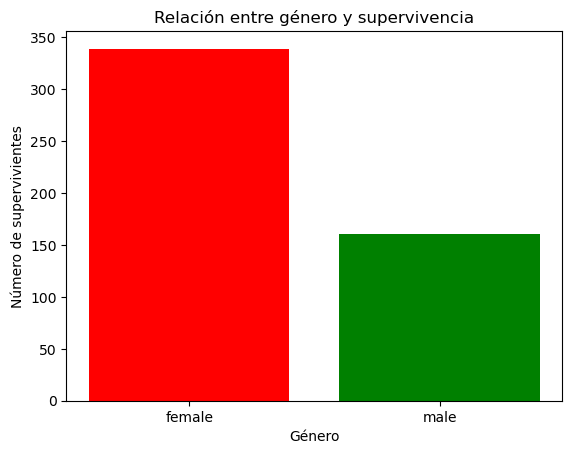

In [ ]:
# Realizar un gráfico de barras que muestre una relación entre dos variables
# Género y Supervivencia
# Segmentar los datos en un nuevo dataframe
datos=df_titanic[["sex","survived"]]
# Datos agrupados
agrupado = datos.groupby("sex").survived.sum()
#Graficar
plt.bar(agrupado.index, agrupado.values, color = ['red','green'])
# Etiquetas eje abscisas 
plt.xlabel("Género")
# Etiquetas eje ordenadas
plt.ylabel("Número de supervivientes")
# Título 
plt.title("Relación entre género y supervivencia")
plt.show()

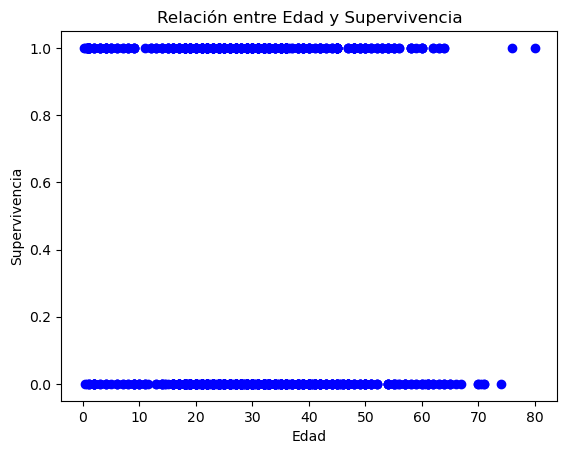

In [ ]:
# Scatterplot
datos1 = df_titanic[["age","survived"]]
plt.scatter(datos1.age, datos1.survived, color = "blue")
plt.xlabel("Edad")
plt.ylabel("Supervivencia")
plt.title("Relación entre Edad y Supervivencia")
plt.show()

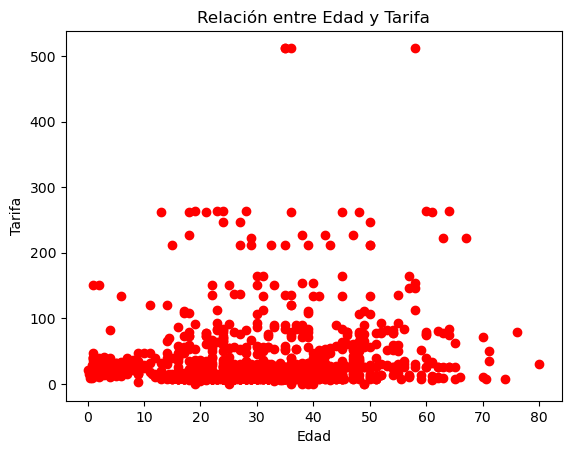

In [ ]:
# Otro gráfico de dispersión entre edad y tarifa
datos2 = df_titanic[["age","fare"]]
plt.scatter(datos2.age, datos2.fare, color="red")
plt.xlabel("Edad")
plt.ylabel("Tarifa")
plt.title("Relación entre Edad y Tarifa")
plt.show()

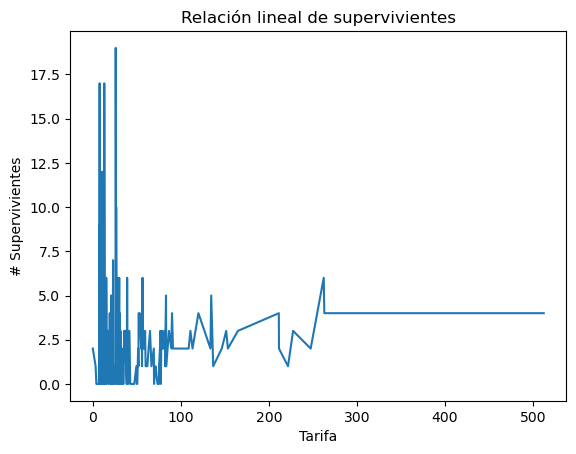

In [ ]:
'''
Generar una gráfica de linea que muestre la cantidad de psajeros que han sobrevivido
a lo largo de los años
'''
datos3 = df_titanic.groupby("fare")["survived"].sum()
plt.plot(datos3.index, datos3.values)
plt.xlabel("Tarifa")
plt.ylabel("# Supervivientes")
plt.title("Relación lineal de supervivientes")
plt.show()

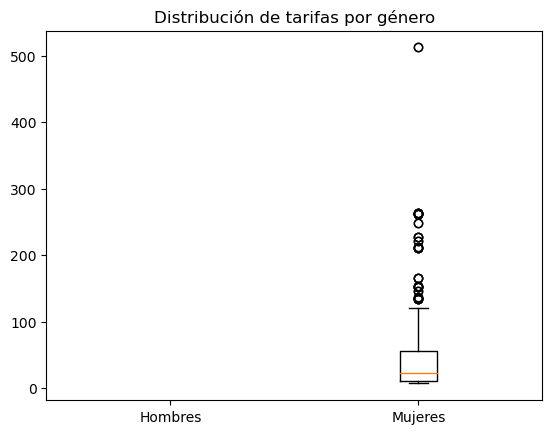

In [ ]:
# Diagrama de cajas por atributos condicionales
# Diagrama de cajas por género

plt.boxplot([df_titanic[df_titanic["sex"]=="male"]["fare"],
             df_titanic[df_titanic["sex"]=="female"]["fare"]],
            labels=["Hombres","Mujeres"])
plt.title("Distribución de tarifas por género")
plt.show()

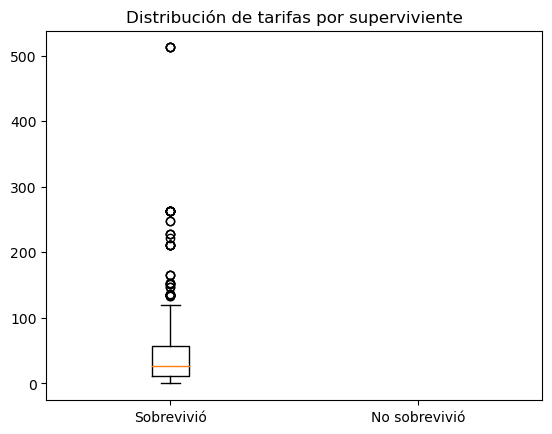

In [ ]:
# Diagrama de cajas por superviviente

plt.boxplot([df_titanic[df_titanic["survived"]==1]["fare"],
             df_titanic[df_titanic["survived"]==0]["fare"]],
            labels=["Sobrevivió","No sobrevivió"])
plt.title("Distribución de tarifas por superviviente")
plt.show()


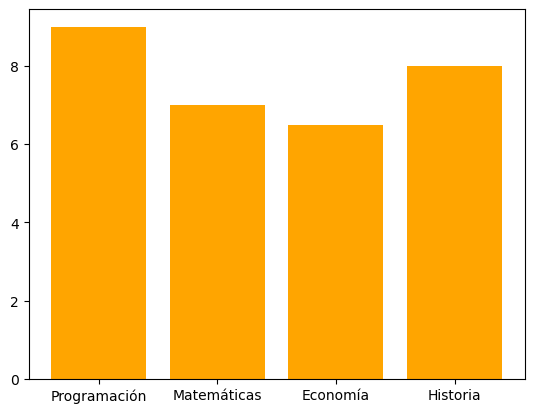

In [ ]:
# Funciones híbridas 
# Escribir una función que reciba las notas de un curso y que muestre dichas notas 
# de asignatura en un diagrama de barras

# Crear una función 
# se debe cargar la libreria matplotlib.pyplot

def diagrama_barras_notas(notas,color):
    
    fig,ax=plt.subplots() # Define la figura y los ejes de Matplotlib
    ax.bar(notas.keys(), notas.values(), color=color)# Dibujar las barras con las notas 
    return ax

# Cargamos datos 
notas={"Programación":9,"Matemáticas":7,"Economía":6.5,"Historia":8}
diagrama_barras_notas(notas,'orange')
plt.show()


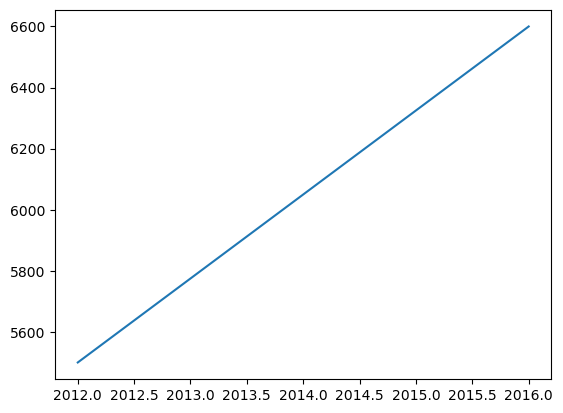

In [ ]:
"""
Escribir un código que solicite a un usuario por las ventas de un rango de 
años y que muestre la evolución de dichas ventas
"""

# El programa solicita un año inicial
inicio = int(input("Introduzca el año inicial: "))
# El programa solicita un año final
fin = int(input("Introduzca el año final: "))
# Introducir las ventas de un año determinado
# Vamos a dejar la variable ventas como un conjunto vacío
ventas = {}
# Vamos a crear una función de ventas evolutivas mediante el comando for 
# i será el contador y tomará los valores desde el año inicial hasta el año final
for i in(inicio,fin+1):
    # PReguntamos las ventas del año i se guarden en clave del año y del valor de ventas
    ventas[i]=float(input("Introduce las ventas del año " + str(i)+": "))
    
# Graficamos 
fig, ax=plt.subplots()
# Dibujamos la línea de ventas 
ax.plot(ventas.keys(),ventas.values())
#Mostramos el gráfico en pantalla 
plt.show()

In [7]:
def grades(*values):
    grade_list = pd.Series([i for i in values ])
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots()
    grade_list.plot(kind = 'bar', title = 'Notas' )
    return plt.show()

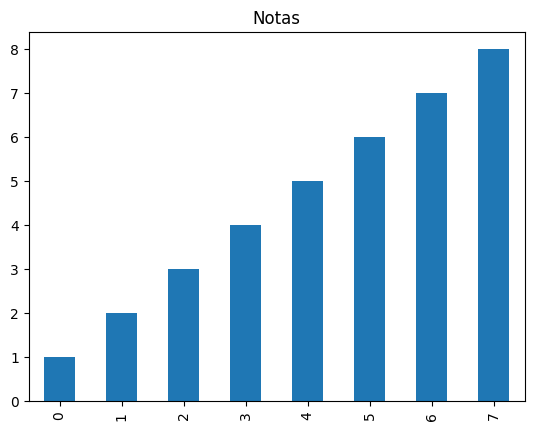

In [8]:
grades(1,2,3,4,5,6,7,8)

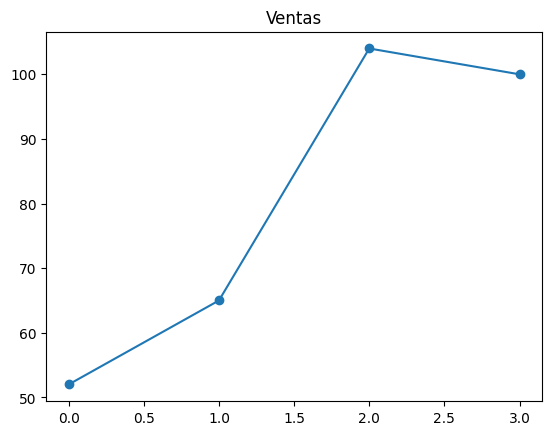

In [9]:
def f_ventas():
    inicio = int(input('Introduzca el año inicial: '))
    fin = int(input('Introduzca el año final: '))
    ventas = []
    for i in range(inicio, fin + 1):
        value = float(input(f"Ventas del año {i}: "))
        ventas.append(value)
    pd.Series(ventas).plot(kind = 'line', title = 'Ventas',marker = 'o')
    return plt.show()

f_ventas()

### 4. Seaborn

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1,)
sns.violinplot(data = datos, x = 'stat', y = 'math', palette = 'deep')
plt.title('Distribución de notas por clase', size = 12)
plt.xlabel(None)
plt.ylabel('Math grade')
plt.plot()

 #### Gráfico de violin


NameError: name 'sns' is not defined